In [ ]:
# MIT License
#
# @title Copyright (c) 2025 Mauricio Tec { display-mode: "form" }

# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.


# Welcome to the HDSI Winter Workshop on LLMs as Autonomous Agents


<img src="https://drive.google.com/uc?export=view&id=1q4SGPmn6sWQhskt4D-1D09q_6C9FDz_L" alt="drawing" width="400"/>


# **Part I: Introduction to Agentic Frameworks**

<a target="_blank" href="https://colab.research.google.com/github/mauriciogtec/hdsi-winter-workshop/blob/main/llm-agents-part1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Expected completion time: 1 hour


## March 7, 2025  <br> Mauricio Tec



**TL;DR** This interactive tutorial introduces the key conceptual framework of LLM agentic systems and provides hands-on experience with techniques such as Chain of Thought and ReAct. Through multiple examples, it demonstrates both the use of the full-featured `smolagents` agentic library and implementing agents from scratch using basic LLM completion functionality.

<img src="https://drive.google.com/uc?export=view&id=1Agfj2lsK155vzmvG6vB4dScH7RqUWV9B" alt="drawing" width="400"/>

<!-- <img src="https://drive.google.com/uc?export=view&id=11o2zAv2_Cu8BL-FVdoRY8z5IEruO3ElZ" alt="drawing" width="400"/> -->

<!-- https://drive.google.com/file/d/11o2zAv2_Cu8BL-FVdoRY8z5IEruO3ElZ/view?usp=sharing -->


See also:

* [Next (Part II): Grounding Agents with Fine-tuning and RL](https://colab.research.google.com/github/mauriciogtec/hdsi-winter-workshop/blob/main/llm-agents-part2.ipynb)
* [Previous (Pre-assignment): Setup LLM Access & API Keys](https://colab.research.google.com/github/mauriciogtec/hdsi-winter-workshop/blob/main/pre-assignment.ipynb)



## Getting Started: Software Prerequisites & Setup


### Utility Function: Markdown Printing

Before proceeding, we will define a very simple utility function to print nicely in a colab notebook environment with Markdown. This is not really needed, but it will make visualizations easier and nicer.


In [ ]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

test = "`This is code`. *This is italics*. **This is bold**."
printmd(test)

`This is code`. *This is italics*. **This is bold**.

### Package Requirements


We will be using the recent `smolagents` library for demonstrating advanced LLM agentic usage. `smolagents` was released only a few months ago by `HuggingFace`. It is designed to be extremely lightweight, yet powerful.

ℹ️ Our goal is not only to use it, but to understand its underpinnings. We will do so by coding our own version of its functionality from scratch using only LLM completion.

📚 We will install `smolagents` with the option `[all]` which also installs `litellm` and other libraries we need.

⚠️ You might receive an error due to the pandas and colab version. You can
safely ignore.

<img src="https://camo.githubusercontent.com/c6efa99360afde7cf829dff3cad81e56573658c1843464dff1fbb30a8f63b082/68747470733a2f2f68756767696e67666163652e636f2f64617461736574732f68756767696e67666163652f646f63756d656e746174696f6e2d696d616765732f7265736f6c76652f6d61696e2f736d6f6c6167656e74732f736d6f6c6167656e74732e706e67" alt="drawing" width="300"/>



In [ ]:
%pip install -q  smolagents[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0

### LLM Setup

Most LLMs today adhere to the OpenAI conversational standard. For this tutorial we will use 🚅 `litellm` with ChatGPT models.


Since `litellm` provides a common interface based on the OpenAI standard for many LLM models and providers, you can easily switch to your prefer LLM provider (e.g., Groq, HFApi, Bedrock).

We will assume that you already have an API key setup correctly in the Jupyter notebook. Make  sure to have the appropriate key added to the Google colab secretes or as an environment variable if running locally.

I will be using `gpt-4o-mini` for all demos, but feel free to use other LLMs by simply changing the LLM model parameter below.

ℹ️ Groq has a free-tier, but the token rate will create problems. The cost of running this notebook is only a few cents of a dollar, but a pro account is needed for many of the providers.

In [ ]:
# @title API Keys and Test LLM Call
# Ignore if running locally and API keys are in environment

import os
from google.colab import userdata
import litellm

# Retrieve open AI key from Colab secrets
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Example for other providers
# os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
# os.environ["HUGGINGFACE_API_KEY"] = userdata.get('HUGGINGFACE_API_KEY')

# Default option: gpt
model_id = "gpt-4o-mini" # @param {type: 'string'}

# Other possible modeks
# model_id = "groq/llama-3.3-70b-versatile"
# model_id = "huggingface/meta-llama/Meta-Llama-3.3-70B-Instruct"

prompt = """
Explain the standard openai chat API for llms based on
a JSON list of messages.  Why is this API so widely used?
Your answer should be short.
Include an example with five entries in a chat history.
Explain the roles (system, user, assistant) and content.
Do we always need the system prompt?
Explain how the message list is usually transformed into a single prompt.
How is this single prompt used to pretrain LLMs for next-token prediction?
"""

messages=[
    {"role": "system", "content": "You an assistant that loves emojis in every."},
    {"role": "user", "content": prompt}
]

response = litellm.completion(messages=messages, model=model_id)

printmd(response.choices[0].message.content)

The OpenAI Chat API for large language models (LLMs) utilizes a JSON list of messages to facilitate conversation flow. This API is widely used due to its adaptable nature and efficient handling of context, which allows for dynamic interaction.

### Example of a Chat History:
```json
[
  {"role": "system", "content": "You are a helpful assistant."},
  {"role": "user", "content": "What’s the capital of France?"},
  {"role": "assistant", "content": "The capital of France is Paris."},
  {"role": "user", "content": "Can you tell me more about Paris?"},
  {"role": "assistant", "content": "Paris is known for its art, fashion, and culture."}
]
```

### Explanation of Roles:
- **System**: Sets the behavior or guidelines for the assistant, helping it to understand its role (e.g., "You are a helpful assistant."). While it's generally beneficial, it's not always required.
- **User**: Represents the input from the person interacting with the model, prompting it to respond to questions or requests.
- **Assistant**: Contains responses generated by the LLM based on user prompts or preceding messages.

### Transformation to a Single Prompt:
The message list is generally concatenated into a single string, effectively merging the roles and content into a format that the model can process, ensuring it maintains context and conversational flow.

### Use in Pretraining LLMs:
This single prompt generated from the message list is then used for next-token prediction, where the LLM learns to predict the subsequent piece of text given the previous context. This process refines the model's ability to generate relevant and contextual responses in conversation.

By combining structured input with dynamic interactions, the API enhances user experience, making it a preferred choice for developers! 🎉😁

#### Test Agentic Framework: `smolagents`

Let's test the `smolagents` framework that we will use as an example of a full agentic pipeline.


In [ ]:
import smolagents

# Setup LLM model as object using LiteLLM wrapper
model = smolagents.LiteLLMModel(model_id=model_id)
agent = smolagents.CodeAgent(model=model, tools=[], add_base_tools=True)
agent.run(task="What are billboard top song right now?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What are billboard top song right now?                                                                          │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  top_song_info = web_search(query="current Billboard top song")                                                   
  print(top_song_info)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Billboard Hot 100™](https://www.billboard.com/charts/hot-100/)
THE WEEK'S MOST POPULAR CURRENT SONGS ACROSS ALL GENRES, ... Billboard Hot 100 Top 10 Countdown For March 1st, 2025
Billboard Hot 100™ Week of March 1, 2025. This Week

[Billboard Hot 100 - Official Charts](https://www.officialcharts.com/charts/billboard-hot-100-chart/)
Billboard Hot 100 26 February 2025 - 4 March 2025 The Hot 100 is the United States' main singles chart, compiled by
Billboard magazine based on sales, airplay and streams in the US.

[Billboard Hot 100 - YouTube Music](https://music.youtube.com/playlist?list=PLbFYLrxJjnCu9CzAAn9S9x2D3zzaz2g9s)
Billboard Top 100 - updated weekly

[The Billboard Hot 100 | Top songs for the week of 2024-08-10 
...](https://ca.billboard.com/charts/hot-100/2024-08-10)
The most popular songs across all genres for the week of 2024-08-10 ranked by streaming activity, ... The week's 
most popular current songs across all genres, ranked by streaming activity from digital music sources tracked by 
Luminate, radio airplay audience impressions as measured by Luminate and sales data as compiled by Luminate ...

[US Singles Top 100 - Music Charts](https://acharts.co/us_singles_top_100)
View the current US Singles Top 100 with at #1 Luther by Kendrick Lamar and SZA. Download as PDF and watch all the 
videos of the chart. ... Compiled by: Billboard Hot 100 March 1, 2025 (week 09/25) Chart; Drop-outs; Videos; 
Archive; CHARTLIST. Current ... A Bar Song (tipsy) Shaboozey peak position: 1 - total weeks: 45

[Billboard Hot 100 - YouTube](https://www.youtube.com/playlist?list=PLiiGCi0YC98uh8ggHxqIrhEolgW9XH0r9)
The official www.billboard.com/charts features this week's most popular songs across all genres, ranked by radio 
airplay monitored by Nielsen BDS, download s...

[Billboard Hot 100 - Official Charts](https://www.officialcharts.com/billboard-hot-100-chart/)
The Hot 100 is the United States' main singles chart, compiled by Billboard magazine based on sales, airplay and 
streams in the US. View the full Hot 100 here.

[Billboard Hot 100 on 13/9/2023 - Official 
Charts](https://www.officialcharts.com/charts/billboard-hot-100-chart/hot100/)
Official Singles Chart Top 100 ... The Hot 100 is the United States' main singles chart, compiled by Billboard 
magazine based on sales, airplay and streams in the US. ... Oliver Anthony Music ...

[Pop Top 40 - iHeart](https://www.iheart.com/playlist/pop-top-40-312064750-GyZXToRd3rRqdcpVy8A6JW/)
Pop Top 40. The 40 biggest Pop Songs this week. Share. SONG / ALBUM TITLE. ARTIST. DURATION. Die With A Smile Lady 
Gaga & Bruno Mars ...

[Billboard Artist 100 | Top Music Artists](https://www.billboard.com/charts/artist-100/)
the week's most popular artists across all genres, ranked by album and track sales as provided by luminate, radio 
airplay audience impressions as provided by luminate, streaming activity data ...

Out: None

[Step 0: Duration 1.74 seconds| Input tokens: 2,081 | Output tokens: 66]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  billboard_url = "https://www.billboard.com/charts/hot-100/"                                                      
  top_song_info = visit_webpage(url=billboard_url)                                                                 
  print(top_song_info)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Billboard Hot 100™

 

 

 

 

 

×

 
![an image, when javascript is unavailable](https://sb.scorecardresearch.com/p?c1=2&c2=6035310&c4=&cv=3.9&cj=1)
 

[×](#)

[Skip to main content](#pagetop) 

Open menu

Search

Click to Expand Search Input

[Billboard](https://www.billboard.com/ "Billboard")
[Billboard](https://www.billboard.com/ "Billboard")

Search

Click to Expand Search Input

LOGIN 
Login

Account

* [Manage Account](/my-account)
* Log Out

[Account](/my-account)

Search

Click to Expand Search Input

* [Charts](/charts/)
* [Music](https://www.billboard.com/c/music/)
* [Video](https://www.billboard.com/video/)
* [Shop](https://www.billboard.com/h/shop-billboard/)
* [Awards](https://www.billboard.com/h/awards-news/)
* [Business](/pro/)

[Billboard](https://www.billboard.com/ "Billboard")

* [Charts](/charts/)
* [Music](https://www.billboard.com/c/music/)
* [Video](https://www.billboard.com/video/)
* [Shop](https://www.billboard.com/h/shop-billboard/)
* [Awards](https://www.billboard.com/h/awards-news/)
* [Business](/pro/)

LOGIN 
Login

Click to Expand Search Input

Account

* [Manage Account](/my-account)
* Log Out

[Account](/my-account)

* [Billboard Hot 100](https://www.billboard.com/charts/hot-100/)
* [Year-End Charts](https://www.billboard.com/charts/year-end/)
* [21st Century Charts](https://www.billboard.com/p/top-chart-hits-21st-century/)
* [Honda Stage](https://www.billboard.com/hubs/honda-stage-2024/)
* [Billboard Music Awards](https://www.billboard.com/h/billboard-music-awards-videos-2024/)
* [Family](https://www.billboard.com/p/billboard-family/)
* [Global News](/t/global/)
* [Español](https://www.billboard.com/c/espanol/)

Open menu

Search

Click to Expand Search Input

[Billboard](https://www.billboard.com/ "Billboard")
[Billboard](https://www.billboard.com/ "Billboard")

Search

Click to Expand Search Input

LOGIN 
Login

Account

* [Manage Account](/my-account)
* Log Out

[Account](/my-account)

Search

Click to Expand Search Input

* [Charts](/charts/)
* [Music](https://www.billboard.com/c/music/)
* [Video](https://www.billboard.com/video/)
* [Shop](https://www.billboard.com/h/shop-billboard/)
* [Awards](https://www.billboard.com/h/awards-news/)
* [Business](/pro/)

Billboard Hot 100™
==================

[All Charts](/charts/)

[All Charts](/charts/)

[Menu](#)

* [Billboard Hot 100™](/charts/hot-100)
* [Billboard 200™](/charts/billboard-200)
* [Global 200](/charts/billboard-global-200)
* [View All](/charts/)

[Close](#)

[Datepicker](#)

Week of March 8, 2025
---------------------

[Info](#)

Billboard Hot 100™
------------------

THE WEEK’S MOST POPULAR CURRENT SONGS ACROSS ALL GENRES, RANKED BY STREAMING ACTIVITY FROM DIGITAL MUSIC SOURCES 
TRACKED BY LUMINATE, RADIO AIRPLAY AUDIENCE IMPRESSIONS AS MEASURED BY LUMINATE AND SALES DATA AS COMPILED BY 
LUMINATE.

[see charts legends](https://www.billboard.com/billboard-charts-legend/)

[Share](#)

* [Share this article on 
Facebook](https://www.facebook.com/dialog/share?title=Billboard%20Hot%20100™&sdk=joey&display=popup&ref=plugin&src=
share_button&app_id=966242223397117&href=https://www.billboard.com/charts/hot-100/)
* [Share this article on 
Twitter](https://twitter.com/intent/post?url=https://www.billboard.com/charts/hot-100/&text=Billboard%20Hot%20100%E
2%84%A2&via=billboard)
* [Share this article on 
Flipboard](https://share.flipboard.com/bookmarklet/popout?v=2&url=https://www.billboard.com/charts/hot-100/&title=B
illboard%20Hot%20100™)
* [Share this article on 
Pinit](https://pinterest.com/pin/create/link/?url=https://www.billboard.com/charts/hot-100/&description=Billboard%2
0Hot%20100™)
* [+ additional share options added](#)
* [Share this article on Tumblr](#)
* [Share this article on Reddit](#)
* [Share this article on Linkedin](#)
* [Share this article on Whatsapp](#)
* [Share this article on Email](#)
* Print this article
* [Share this article on Comment](#)

[Menu](#)

* [Billboard Hot 100™](/charts/hot-100)
* [Billboar

[Step 1: Duration 2.93 seconds| Input tokens: 5,097 | Output tokens: 158]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  current_top_song = "Luther by Kendrick Lamar & SZA"                                                              
  final_answer(current_top_song)                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Luther by Kendrick Lamar & SZA

[Step 2: Duration 1.28 seconds| Input tokens: 11,332 | Output tokens: 238]

'Luther by Kendrick Lamar & SZA'

_________

# I. Introduction to LLM Agents


* LLM agents are programs where LLMs control the flow of a program to solve a task. You can also think of agentic LLMs as those than can *act* in an interactive environment [(Sumers et al. 2024)](https://arxiv.org/pdf/2309.02427v3)

* Examples include autonomous robots, digital assistants, recommendation systems, video game NPCs, web crawler, etc.

* Even a simple Q&A task can be approach in an *agentic* way, by breaking down the steps to a solution in multiple sequential steps, each which can use tools or produce thoughts.

* Design patterns of LLM agents include:

  * Reasoning
  * Tools
  * Memory
  * Planning

* We will explore and see in action these topics in this part of the tutorial.


<!--
<img src="https://drive.google.com/uc?export=view&id=1SnyymyuwCdj_kFKTx8EQZXXXAPNYaJ9z" alt="drawing" width="125"/> -->



<img src="https://drive.google.com/uc?export=view&id=1en61QPhrx5TcEbCfK_RxmGqOf6O_qySl" alt="drawing" width="250"/>


### Philosophy of this Tutorial

 We aim for a balance between using the current agentic AI stack and understanding core principles. Sometimes we will use existing abstractions, but we will re-implement some of them using open-source in-device LLMs from HuggingFace.



________________


## Agentic Workflow and Sequential Decision Making

* What is common in practically all agentic frameworks is the notion of autonomous sequential decision making.

* Sequential decision making in a nutshell:
    * We start with an initial observation $O_0$, which would typically include information about the task to solve. The agent must take an action $A_0$ based on $O_0$.
    * In non-agentic frameworks, $A_0$ would be the final answer to the query.
    * In an agentic framework, at each time $t\in\{0,\ldots, H-1\}$, the agent must choose an action $A_t$ based on the observation history $(O_0, A_0, \ldots, A_{t-1},O_{t-1})$. The process continues until a final answer is found or an external environments sends a completion signal.
    * In modern LLM agentic setting, the observation history is sometimes called the *memory*. Although the memory can include additional sources as well.

* The agent's actions can be external or internal.
  *  Internal actions typically consist of *thoughts*, aka, *reasoning steps*. For example, an agentic framework may start with a special prompt about *planning* how to tackle a problem over the next few steps. The plan can be revised after every few observations.
  *  Action can include intermediate steps to solve a problem, such as *calls to tools* like querying a database, searching the web, etc.
  *  Some agents are also embedded in an actual *external* interactive environment which sends a *reward* signal.

* **Main takeaways:**
  * **An agentic approach implies solving a problem with multiple steps incolving reasoning, tool calls, environment interactions, etc.**
  * **A non-sequential problem can be turn into a sequential problem applying the agentic philosphy of breaking it into smaller substeps.**.

<!--   
  * For example, consider the following scenario:
    1. A human asks a robot to fetch an object from the kitchen
    2. The robot must process the query. First, it must decide whether it understood the query, or ask a follow up question. It can start an internal reasoning process to decide whether to ask a follow up question or begin retrieving the object. These decision steps are internal. The follow up question would be an external action.
    3. The robot must plan a route to fetch the object. That is a sequence of internal actions.


* The mapping from observation to action, $O_{\leq t} \mapsto A_t$, is called the *agent's policy*. Typically, the goal is to maximize a *reward* $R_t$. For example, the reward may be an indicator of having or not reached a goal. More generally is a measure of how hell the agent is performing a task.
 -->


<img src="https://drive.google.com/uc?export=view&id=1cbcIMaEJeXZGXAJL7KRWPtUd87_UDopV" alt="drawing" height="125"/>





## Agentic Examples


Before diving in the building blocks and mechanisms. Let us review a few examples of agentic pipelines to get a first feel of the concepts above.

In [ ]:
# @title ArXiv Paper Finder
from smolagents import (
    CodeAgent,
    LiteLLMModel
    UserInputTool,
    DuckDuckGoSearchTool,
    VisitWebpageTool,
    tool
)


task = """
Your task is to help find research papers on arxiv related to a topic.
Start by asking the user the topic. Your final answer must contain the links to
 the papers and an arxiv citation with the authors and year.
Include only the top three more relevant papers.
"""


@tool
def arxiv_search(query: str, num_results: int = 10) -> list[dict[str, str]]:
    """
    Search arXiv for research papers and return titles, abstracts, and links.

    Args:
        query: The search term.
        num_results: Number of results to fetch.

    Returns:
        list: A list of dictionaries containing title, abstract, and link.
    """
    import requests
    from xml.etree import ElementTree
    url = f"http://export.arxiv.org/api/query?search_query={query}&max_results={num_results}"
    response = requests.get(url)
    root = ElementTree.fromstring(response.content)

    results = []
    for entry in root.findall("{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title").text.strip()
        abstract = entry.find("{http://www.w3.org/2005/Atom}summary").text.strip()
        link = entry.find("{http://www.w3.org/2005/Atom}id").text.strip()

        results.append({"title": title, "abstract": abstract, "link": link})

    return results


# == List all the desired tools
tools = [
    UserInputTool(),
    VisitWebpageTool(),
    arxiv_search,
]

# == Initialize OpenAI Model class wrapper
model = LiteLLMModel(
    model_id="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY"),
)

# == Initialize Agent
agent = CodeAgent(model=model, tools=tools, planning_interval=2)


# == Start agent loop
result = agent.run(task)
print(result)

In [ ]:
# @title Coding Project Template Creator based on Github Trending Repos

from smolagents import (
    CodeAgent,
    LiteLLMModel,
    UserInputTool,
    VisitWebpageTool,
    tool
)

# == Setup model

# model=LiteLLMModel(
#     model_id="groq/llama-3.3-70b-versatile",
#     api_base="https://api.groq.com/openai/v1",
#     api_key=os.getenv("GROQ_API_KEY"),
# )

model = LiteLLMModel(
    model_id="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY"),
)

# == Setup tools

@tool
def github_trending_repos(topic: str, num_results: int=20) -> list[dict[str, str]]:
    """
    Search GitHub for trending repositories based on a topic.

    Args:
        topic: The search topic (e.g., "machine learning").
        num_results: Number of results to fetch.

    Returns:
        list: A list of dictionaries containing repository name, description, stars, and URL.
    """
    import requests
    url = f"https://api.github.com/search/repositories?q={topic}+sort:stars&per_page={num_results}"
    headers = {"Accept": "application/vnd.github.v3+json"}

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return f"Error: Unable to fetch results (status code {response.status_code})"

    data = response.json()
    results = []

    for repo in data.get("items", []):
        results.append({
            "name": repo["full_name"],
            "description": repo["description"],
            "stars": repo["stargazers_count"],
            "url": repo["html_url"]
        })

    return results


@tool
def write_to_file(path: str, content: str) -> None:
    """
    Write content to a file. Needed for safety since the agent's code is not
    allowed to execute unauthorized functions.

    Args:
        path: The name of the path/file to write to. If the path ends with /
              it is assumed to be a directory.
        content: The content to write to the file.
    """
    import os
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "a") as f:
        f.write(content)


tools=[
    UserInputTool(),
    VisitWebpageTool(),
    github_trending_repos,
    write_to_file,
]

# == Create Agent
agent = CodeAgent(
    model=model,
    tools=tools,
    additional_authorized_imports=["os", "shutil", "random"],
    planning_interval=4,
    max_steps=10,

)

# == Run Task

task = """
Your task is to help design a new coding project template based on existing high-quality
trending repositories.

Here are instructions:
* Ask the user for the overall topic.
* Search the Github trending repositories for the selected topic / requirements
  Choose a repository based on code quality and Github stars to use as blueprint.
* Navigate to the selected repository to inspect the folder and file structure.
  Use it as a reference for the new project template. Create the new project template
  in in a directory called `template_xxxx` where xxxxx is a random number.
  Use the write_to_file tool instead of the open function for safety.
  The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.
* Include a pip requirements with packages based on the selected repo and topic.
* Create a README.md that describes all the file structure (use a nice diagram),
  installation instructions, dependencies, example run code, configs, etc.
  The overall readme must look attractive, use emojis.
  At the end of the readme mention the Github repository used as reference, and a statement
  tht all the contents have been autogenerated by a `smolagents` LLM agent.
* Your final answer should be a dictionary with keys 'readme' and 'path' as in
  `final_answer({'readme': '...', 'path': '...'})`.
  The value of the readme should be the content of README.md.
  The value of path is the location where project was created.
"""

result = agent.run(task)

# == Print results
printmd(f"### README")
printmd(result['readme'])

printmd(f"### Verify file structure at {result['path']}")
%ls -lah {result['path']}

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Your task is to help design a new coding project template based on existing high-quality                        │
│ trending repositories.                                                                                          │
│                                                                                                                 │
│ Here are instructions:                                                                                          │
│ * Ask the user for the overall topic.                                                                           │
│ * Search the Github trending repositories for the selected topic / requirements                                 │
│   Choose a repository based on code quality and Github stars to use as blueprint.                               │
│ * Navigate to the selected repository to inspect the folder and file structure.                                 │
│   Use it as a reference for the new project template. Create the new project template                           │
│   in in a directory called `template_xxxx` where xxxxx is a random number.                                      │
│   Use the write_to_file tool instead of the open function for safety.                                           │
│   The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.            │
│ * Include a pip requirements with packages based on the selected repo and topic.                                │
│ * Create a README.md that describes all the file structure (use a nice diagram),                                │
│   installation instructions, dependencies, example run code, configs, etc.                                      │
│   The overall readme must look attractive, use emojis.                                                          │
│   At the end of the readme mention the Github repository used as reference, and a statement                     │
│   tht all the contents have been autogenerated by a `smolagents` LLM agent.                                     │
│ * Your final answer should be a dictionary with keys 'readme' and 'path' as in                                  │
│   `final_answer({'readme': '...', 'path': '...'})`.                                                             │
│   The value of the readme should be the content of README.md.                                                   │
│   The value of path is the location where project was created.                                                  │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o ─────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
                ```
                ```
1. Use the `user_input` tool to ask the user for the overall topic of the coding project.

2. Use the `github_trending_repos` tool to search for trending repositories related to the provided topic. Set the 
number of results to a reasonable limit, such as 5, to manage data size.

3. Review the results from the GitHub trending search and select a repository based on code quality indicators and 
the number of GitHub stars.

4. Use the `visit_webpage` tool to navigate to the chosen repository's page and inspect its content to understand 
the project structure, including folders and files such as scripts, notebooks, configs, etc.

5. Generate a random number to be used in the creation of a new project template directory named `template_xxxx`, 
where `xxxx` is the generated random number.

6. Use the `write_to_file` tool to create the new project template directory and replicate the identified structure
from the selected GitHub repository. This structure should include templates for scripts, notebooks, configuration 
files, etc.

7. Analyze the dependencies of the chosen repository to compile a list of packages and their versions. Write this 
list into a `requirements.txt` file in the new project directory using the `write_to_file` tool.

8. Construct a detailed and attractive README.md file. This file should:
   - Describe the overall project and its purpose.
   - Include a diagram of the file structure.
   - Provide installation instructions, list dependencies, and include example run code and configurations.
   - Mention the original GitHub repository used as a reference.
   - State that all contents were autogenerated by a `smolagents` LLM agent.
   - Use emojis and markdown formatting to enhance readability and appeal.
   - Write the README.md file to the new project directory using the `write_to_file` tool.

9. Compile the `final_answer` by creating a dictionary with the content of README.md as the 'readme' key's value 
and the path of the newly created project directory as the 'path' key's value.

10. Return the `final_answer` dictionary to complete the task.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  def get_topic():                                                                                                 
      user_topic = user_input(question="Please enter the overall topic of the coding project")                     
      print(user_topic)                                                                                            
  get_topic()                                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Please enter the overall topic of the coding project => Type your answer here:Web scraper and visualizer of climate date


Execution logs:
Web scraper and visualizer of climate date

Out: None

[Step 0: Duration 29.21 seconds| Input tokens: 3,438 | Output tokens: 170]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  topic = "Web scraper and visualizer of climate data"                                                             
  num_results = 5                                                                                                  
  repositories = github_trending_repos(topic=topic, num_results=num_results)                                       
  print(repositories)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[{'name': 'ajayraj-cmu/Columbia-DivHacks-Hackathon', 'description': 'Here is a documentation of all of the code 
that my team and I developed in order to make a partial global visualization of climate refugeeism using the 
SnapChat AR Spectacles lenses. We developed a web scraper and API keys to find our refugee and global natural 
disaster data, and then linked this without Snap AR program (Script).', 'stars': 1, 'url': 
'https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon'}]

Out: None

[Step 1: Duration 3.15 seconds| Input tokens: 7,148 | Output tokens: 285]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  repository_url = "https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon"                                    
  repository_content = visit_webpage(url=repository_url)                                                           
  print(repository_content)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
GitHub - ajayraj-cmu/Columbia-DivHacks-Hackathon: Here is a documentation of all of the code that my team and I 
developed in order to make a partial global visualization of climate refugeeism using the SnapChat AR Spectacles 
lenses. We developed a web scraper and API keys to find our refugee and global natural disaster data, and then 
linked this without Snap AR program (Script).

[Skip to content](#start-of-content)

Navigation Menu
---------------

Toggle navigation

[Sign in](/login?return_to=https%3A%2F%2Fgithub.com%2Fajayraj-cmu%2FColumbia-DivHacks-Hackathon)

* Product

  + [GitHub Copilot

    Write better code with AI](https://github.com/features/copilot)
  + [Security

    Find and fix vulnerabilities](https://github.com/features/security)
  + [Actions

    Automate any workflow](https://github.com/features/actions)
  + [Codespaces

    Instant dev environments](https://github.com/features/codespaces)
  + [Issues

    Plan and track work](https://github.com/features/issues)
  + [Code Review

    Manage code changes](https://github.com/features/code-review)
  + [Discussions

    Collaborate outside of code](https://github.com/features/discussions)
  + [Code Search

    Find more, search less](https://github.com/features/code-search)

  Explore
  + [All features](https://github.com/features)
  + [Documentation](https://docs.github.com)
  + [GitHub Skills](https://skills.github.com)
  + [Blog](https://github.blog)
* Solutions

  By company size
  + [Enterprises](https://github.com/enterprise)
  + [Small and medium teams](https://github.com/team)
  + [Startups](https://github.com/enterprise/startups)
  + [Nonprofits](/solutions/industry/nonprofits)

  By use case
  + [DevSecOps](/solutions/use-case/devsecops)
  + [DevOps](/solutions/use-case/devops)
  + [CI/CD](/solutions/use-case/ci-cd)
  + [View all use cases](/solutions/use-case)

  By industry
  + [Healthcare](/solutions/industry/healthcare)
  + [Financial services](/solutions/industry/financial-services)
  + [Manufacturing](/solutions/industry/manufacturing)
  + [Government](/solutions/industry/government)
  + [View all industries](/solutions/industry)

  [View all solutions](/solutions)
* Resources

  Topics
  + [AI](/resources/articles/ai)
  + [DevOps](/resources/articles/devops)
  + [Security](/resources/articles/security)
  + [Software Development](/resources/articles/software-development)
  + [View all](/resources/articles)

  Explore
  + [Learning Pathways](https://resources.github.com/learn/pathways)
  + [Events & Webinars](https://resources.github.com)
  + [Ebooks & Whitepapers](https://github.com/resources/whitepapers)
  + [Customer Stories](https://github.com/customer-stories)
  + [Partners](https://partner.github.com)
  + [Executive Insights](https://github.com/solutions/executive-insights)
* Open Source

  + [GitHub Sponsors

    Fund open source developers](/sponsors)

  + [The ReadME Project

    GitHub community articles](https://github.com/readme)

  Repositories
  + [Topics](https://github.com/topics)
  + [Trending](https://github.com/trending)
  + [Collections](https://github.com/collections)
* Enterprise

  + [Enterprise platform

    AI-powered developer platform](/enterprise)

  Available add-ons
  + [Advanced Security

    Enterprise-grade security features](https://github.com/enterprise/advanced-security)
  + [GitHub Copilot

    Enterprise-grade AI features](/features/copilot#enterprise)
  + [Premium Support

    Enterprise-grade 24/7 support](/premium-support)
* [Pricing](https://github.com/pricing)

Search or jump to...

Search code, repositories, users, issues, pull requests...
==========================================================

Search

Clear

[Search syntax 
tips](https://docs.github.com/search-github/github-code-search/understanding-github-code-search-syntax)

Provide feedback
================

We read every piece of feedback, and take your input very seriously.

Include my email address so I can be contacted

Ca

[Step 2: Duration 6.00 seconds| Input tokens: 11,198 | Output tokens: 498]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import os                                                                                                        
  import random                                                                                                    
                                                                                                                   
  # Generate a random number for directory name                                                                    
  random_number = random.randint(1000, 9999)                                                                       
  directory_name = f"template_{random_number}"                                                                     
                                                                                                                   
  # Create the directory structure based on the inspected repository                                               
  os.makedirs(directory_name, exist_ok=True)                                                                       
                                                                                                                   
  # Define basic template files content                                                                            
  web_scraper_content = "# Web Scraper Script\n\n# This script will scrape climate data.\n\n# [Add code here]"     
  json_file_content = "# JSON Sample Output\n\n# This is a sample JSON output file from the web scraper."          
  lens_studio_code_content = "# Lens Studio Code\n\n# Code for linking data with Lens Studio."                     
  parsing_script_content = "# Parse JSON via Lens Studio Script\n\n# This script parses through JSON files with    
  data."                                                                                                           
                                                                                                                   
  # Write to the file using `write_to_file` tool                                                                   
  write_to_file(path=f"{directory_name}/WebScraper.py", content=web_scraper_content)                               
  write_to_file(path=f"{directory_name}/Json_Sample_Output.json", content=json_file_content)                       
  write_to_file(path=f"{directory_name}/Lens_Studio_Code.py", content=lens_studio_code_content)                    
  write_to_file(path=f"{directory_name}/Parse_JSON_via_Lens_Studio.py", content=parsing_script_content)            
                                                                                                                   
  # Example content for requirements.txt                                                                           
  requirements_content = "requests\nbeautifulsoup4\npandas\n"                                                      
  write_to_file(path=f"{directory_name}/requirements.txt", content=requirements_content)                           
                                                                                                                   
  # Prepare the README.md content                                                                                  
  readme_content = f"""# Web Scraper and Visualizer of Climate Data 🌍                                             
                                                                                                                   
  This project provides a template for building a web scraper and visualizer of climate data. It is inspired by    
  the [Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) GitHub             
  repository.                                                                                                      
                                                          

Out - Final answer: {'readme': '# Web Scraper and Visualizer of Climate Data 🌍\n\nThis project provides a template
for building a web scraper and visualizer of climate data. It is inspired by the 
[Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) GitHub repository.\n\n## 
Project Structure 🚀\n\n## Installation 📥\n\nTo install the necessary dependencies, run:\n\n## Usage 📈\n\nStart 
by running the main scraper script:\n\n## Acknowledgments 🏅\n\nThis template is based on the 
[Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) 
repository.\n\n---\n\n*Autogenerated by a smolagents LLM agent 🤖*\n', 'path': 'template_8579'}

[Step 3: Duration 16.07 seconds| Input tokens: 18,378 | Output tokens: 1,270]

### README

# Web Scraper and Visualizer of Climate Data 🌍

This project provides a template for building a web scraper and visualizer of climate data. It is inspired by the [Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) GitHub repository.

## Project Structure 🚀

## Installation 📥

To install the necessary dependencies, run:

## Usage 📈

Start by running the main scraper script:

## Acknowledgments 🏅

This template is based on the [Columbia-DivHacks-Hackathon](https://github.com/ajayraj-cmu/Columbia-DivHacks-Hackathon) repository.

---

*Autogenerated by a smolagents LLM agent 🤖*


### Verify file structure at template_8579

total 32K
drwxr-xr-x 2 root root 4.0K Mar  3 15:26 ./
drwxr-xr-x 1 root root 4.0K Mar  3 15:26 ../
-rw-r--r-- 1 root root   79 Mar  3 15:26 Json_Sample_Output.json
-rw-r--r-- 1 root root   61 Mar  3 15:26 Lens_Studio_Code.py
-rw-r--r-- 1 root root   87 Mar  3 15:26 Parse_JSON_via_Lens_Studio.py
-rw-r--r-- 1 root root  637 Mar  3 15:26 README.md
-rw-r--r-- 1 root root   31 Mar  3 15:26 requirements.txt
-rw-r--r-- 1 root root   80 Mar  3 15:26 WebScraper.py


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Assist with data wrangling and visualizations. Your solution must be based on                                   │
│ on the two provided datasets: 'customers', and 'orders'.                                                        │
│ You must inspect these datasets to understand how to solve the task.                                            │
│ Task: create a barchart of order amounts by customer name. If a customer has no                                 │
│ orders, include zero in the chart.                                                                              │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'customers':    customer_id  customer_name                                                                     │
│ 0            1       John Doe                                                                                   │
│ 1            2     Jane Smith                                                                                   │
│ 2            3  Emily Johnson                                                                                   │
│ 3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount                                    │
│ 0     1001           1          250                                                                             │
│ 1     1002           2          500                                                                             │
│ 2     1003           1          150}.                                                                           │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
                ```
                1. Inspect the 'customers' dataset to confirm its structure and identify any inconsistencies, such 
as duplicates or null values.
2. Inspect the 'orders' dataset to confirm its structure and ensure there are no null values in the OrderAmount 
field.
3. Compute the total order amount for each customer by joining the 'customers' dataset with the 'orders' dataset on
customer IDs and summing the OrderAmount.
4. Create a merged dataset that includes all customers, setting the order amount to zero for customers who do not 
have any orders.
5. Prepare the data for visualization by creating a final dataset that includes customer names and their 
corresponding total order amounts.
6. Use a suitable Python library to create a bar chart visualizing order amounts by customer name, ensuring that 
customers with zero orders are displayed in the chart.
7. Use the `final_answer` tool to provide the final answer containing the generated bar chart.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
                                                                                                                   
  # Define the datasets                                                                                            
  customers_data = {'customer_id': [1, 2, 3, 4],                                                                   
                     'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']}                
                                                                                                                   
  orders_data = {'OrderID': [1001, 1002, 1003],                                                                    
                  'CustomerID': [1, 2, 1],                                                                         
                  'OrderAmount': [250, 500, 150]}                                                                  
                                                                                                                   
  # Create DataFrames for inspection                                                                               
  customers_df = pd.DataFrame(customers_data)                                                                      
  orders_df = pd.DataFrame(orders_data)                                                                            
                                                                                                                   
  # Inspect customers DataFrame                                                                                    
  customers_info = customers_df.info()                                                                             
  customers_head = customers_df.head()                                                                             
                                                                                                                   
  customers_info, customers_head                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4 non-null      int64 
 1   customer_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


Out: (None,    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown)

[Step 0: Duration 10.44 seconds| Input tokens: 2,806 | Output tokens: 190]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Inspect orders DataFrame                                                                                       
  orders_info = orders_df.info()                                                                                   
  orders_head = orders_df.head()                                                                                   
                                                                                                                   
  orders_info, orders_head                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OrderID      3 non-null      int64
 1   CustomerID   3 non-null      int64
 2   OrderAmount  3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


Out: (None,    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150)

[Step 1: Duration 1.24 seconds| Input tokens: 6,068 | Output tokens: 277]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
                ```

Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task. 
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.

You have been provided with these additional arguments, that you can access using the keys as variables in your 
python code:
{'customers':    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150}.
                ```

                Here is my new/updated plan of action to solve the task:
                ```
                1. Compute the total order amounts for each customer by merging the 'customers' and 'orders' 
datasets on the customer IDs and summing the OrderAmounts.
2. Create a complete dataset of customers with their corresponding total order amounts, ensuring that customers 
with no orders are accounted for with an order amount of zero.
3. Prepare the data for visualization by creating a final DataFrame that includes customer names and their 
corresponding total order amounts.
4. Use a suitable Python library to create a bar chart visualizing order amounts by customer name, ensuring proper 
display of customers with zero orders.
5. Call the final_answer tool to provide the generated bar chart as the final answer to the task.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Merging the datasets to compute total order amounts                                                            
  total_orders_df = customers_df.merge(orders_df.groupby('CustomerID', as_index=False)['OrderAmount'].sum(),       
                                        left_on='customer_id', right_on='CustomerID',                              
                                        how='left')                                                                
                                                                                                                   
  # Filling NaN values with 0 for customers with no orders and renaming columns                                    
  total_orders_df['OrderAmount'].fillna(0, inplace=True)                                                           
  total_orders_df = total_orders_df[['customer_name', 'OrderAmount']]                                              
                                                                                                                   
  # Print to check the resulting DataFrame                                                                         
  print(total_orders_df)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
   customer_name  OrderAmount
0       John Doe        400.0
1     Jane Smith        500.0
2  Emily Johnson          0.0
3  Michael Brown          0.0

Out: None

[Step 2: Duration 10.99 seconds| Input tokens: 10,368 | Output tokens: 469]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Prepare data for visualization                                                                                 
  customer_names = total_orders_df['customer_name']                                                                
  order_amounts = total_orders_df['OrderAmount']                                                                   
                                                                                                                   
  # Create the bar chart                                                                                           
  plt.figure(figsize=(10, 6))                                                                                      
  plt.bar(customer_names, order_amounts, color='skyblue')                                                          
  plt.xlabel('Customer Name')                                                                                      
  plt.ylabel('Total Order Amount')                                                                                 
  plt.title('Total Order Amount by Customer Name')                                                                 
  plt.xticks(rotation=45)                                                                                          
  plt.ylim(0, max(order_amounts) + 100)  # Ensure some space above the tallest bar                                 
  plt.grid(axis='y')                                                                                               
                                                                                                                   
  # Show the plot                                                                                                  
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

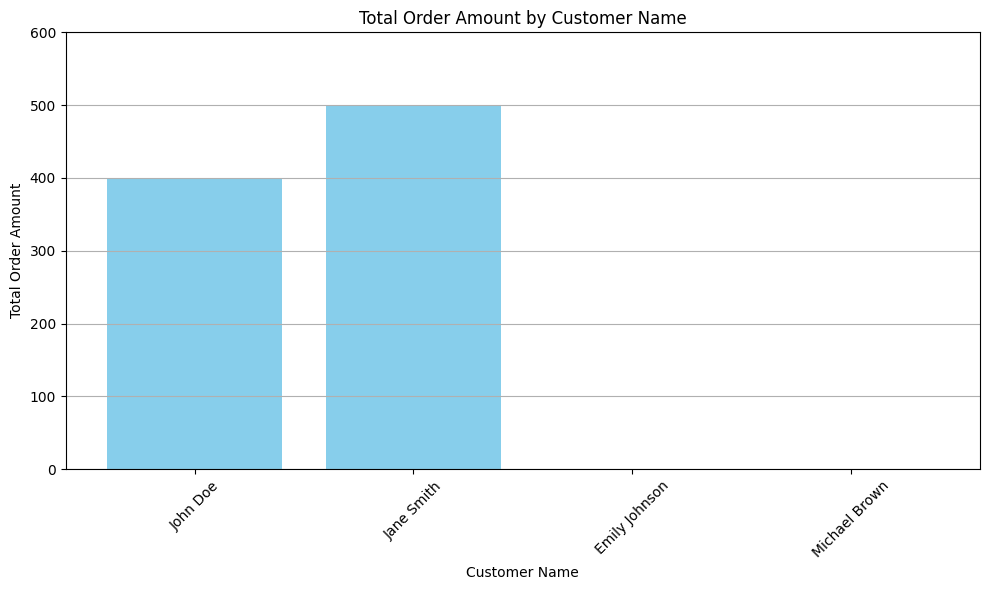

Out: None

[Step 3: Duration 3.71 seconds| Input tokens: 15,092 | Output tokens: 687]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
                ```

Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task. 
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.

You have been provided with these additional arguments, that you can access using the keys as variables in your 
python code:
{'customers':    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150}.
                ```

                Here is my new/updated plan of action to solve the task:
                ```
                1. Prepare the bar chart visualizing total order amounts by customer name, ensuring that the data 
is laid out clearly.
2. Use the `final_answer` tool to provide the generated bar chart as the final answer to the task.


                ```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Since I have already created the bar chart, I will store it in a variable to use it in final_answer.           
  plt.figure(figsize=(10, 6))                                                                                      
  plt.bar(customer_names, order_amounts, color='skyblue')                                                          
  plt.xlabel('Customer Name')                                                                                      
  plt.ylabel('Total Order Amount')                                                                                 
  plt.title('Total Order Amount by Customer Name')                                                                 
  plt.xticks(rotation=45)                                                                                          
  plt.ylim(0, max(order_amounts) + 100)  # Ensure some space above the tallest bar                                 
  plt.grid(axis='y')                                                                                               
  plt.tight_layout()                                                                                               
                                                                                                                   
  # Save the plot as an image                                                                                      
  plt.savefig("order_amounts_by_customer.png")  # Save the figure as a file                                        
                                                                                                                   
  # Now I will call the final_answer tool to provide the generated bar chart.                                      
  final_answer({'answer': "order_amounts_by_customer.png"})                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'answer': 'order_amounts_by_customer.png'}

[Step 4: Duration 18.04 seconds| Input tokens: 20,898 | Output tokens: 861]

{'answer': 'order_amounts_by_customer.png'}

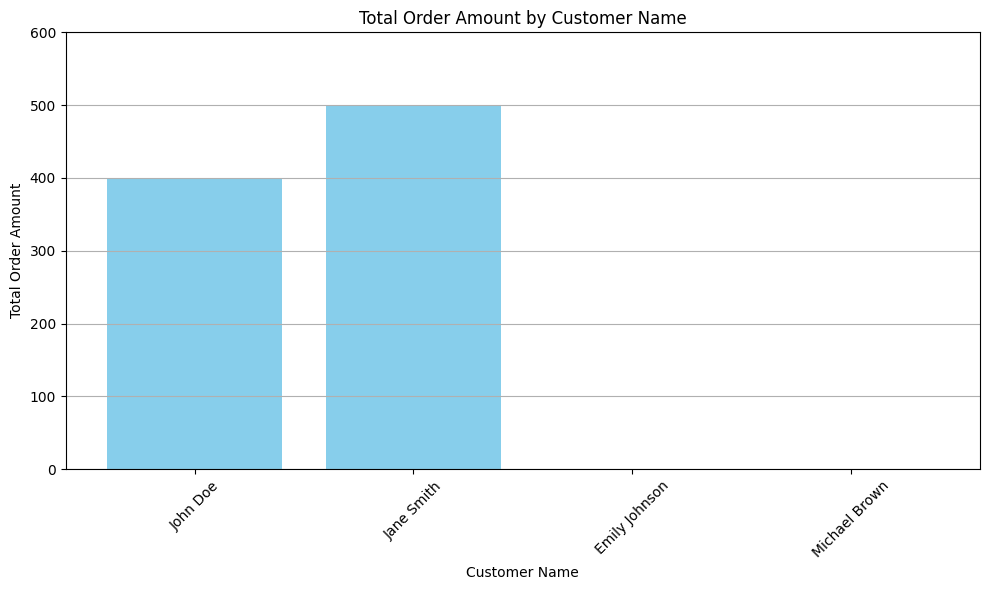

In [ ]:
# @title The Robo-Wrangler: A Data Wranger Assistant

import pandas as pd
from smolagents import (
    CodeAgent,
    LiteLLMModel,
)


# Customers DataFrame
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']
})

# Orders DataFrame
orders = pd.DataFrame({
    'OrderID': [1001, 1002, 1003],
    'CustomerID': [1, 2, 1],
    'OrderAmount': [250, 500, 150]
})


agent = CodeAgent(
    model=model,
    tools=[],
    planning_interval=2,
    additional_authorized_imports=["pandas", "matplotlib"],

)


task = """
Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task.
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.
Show the plot and save it to demo_barchart.png.
"""

agent.run(
    task,
    additional_args={
        "customers": customers,
        "orders": orders,
    }
)


# II. Understanding the Core

We will now understand the principles behind these amazing capabilities.


## Learning Goals


1. We will explore prompting for reasoning, such as chain-of-thought (CoT) [Wei et al., 2022](https://arxiv.org/abs/2201.11903).
2. We will define a minimal mathematical framework for interactive environments with actions, tools, and reasoning, and tools.
3. We will study the `ReAct` framework [(Yao et al. 2022)](https://arxiv.org/abs/2210.03629), which is the most widely used prompting technique to combine actions with reasoning.
4. We will briefly discuss structures for agent memory and correspondance to retrieval augmented generation (RAG) [Lewis et al., 2020](https://arxiv.org/abs/2005.11401) techniques.
5. Compare Tool vs Code calling agents.

Throughout, we will only assume access to the an LLM completion API. The rest, we will 'build from scratch' to mimic the behavior of complex systems such as `smolagents`.





## II.1 Reasoning from Chain of Thought

LLMs are trained for next word/token prediction. As a result, they can fail at very simple tasks requiring multiple steps to solve, particularly with numeric computations. This problem is worsen with smaller LLMs.

One simple solution is to use of chain of thought (CoT). CoT will be our first example of *reasoning* techniques. It will also be the easiest example of *memory* model, in which the memory is simply the agent's previous outputs.


<figure>
<img src="https://drive.google.com/uc?export=view&id=16S6PVq2oDmTwCeuOolQ56GPDTTJdtwJ2" alt="drawing" height="300"/>
<figcaption>Fig. Example from <a href='https://arxiv.org/pdf/2201.11903'>Wei et al. (2022)</a></figcaption>
</figure>

**Why bother about CoT at all?**

Well, smaller LLMs can outperform more expensive ones by simply applying this technique.

<figure>
<img src="https://drive.google.com/uc?export=view&id=1AA-uPPxH5wv7emr4tR41pCG7bhfvmljW" alt="drawing" height="200" width="700"/>
<figcaption>Fig. Benchmarks from <a href='https://arxiv.org/pdf/2201.11903'>Wei et al. (2022)</a></figcaption>
</figure>


In [ ]:
# @title ChatGPT can't reason

# Moderns LLMs are bad at counting. Here is a simple example, which would be easy
# for humans to the visual grouping.
# https://medium.com/@konstantine_45825/gpt-4-cant-reason-2eab795e2523

problem = """
How many times is p negated in the following formula:
~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p
"""

# First test pure LLM completion

result = litellm.completion(
    messages=[{"role": "user", "content": problem}], model=model_id
)
printmd("### Completion-only Solution")
printmd(result.choices[0].message.content)


### Completion-only Solution

To count the number of times \( p \) is negated in the given formula:

```
~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p
```

We can see that the symbol `~` represents the negation operator. 

There are 12 `~` symbols before \( p \). Each pair of negations cancels each other out (i.e., \( \sim \sim p \) is equivalent to \( p \)), so we can determine the effect of the negations by counting them:

1. Since negations cancel each other in pairs, if the total number of negations is even, \( p \) is negated an even number of times, resulting in the original \( p \). If the number is odd, \( p \) is negated an odd number of times, resulting in \( \sim p \).
  
Now breaking down the count:
- There are 12 negations in total.

Since 12 is an even number, \( p \) effectively experiences no net negation, and you would interpret the formula as just \( p \).

Therefore, \( p \) is negated **12 times** in terms of the number of negations applied, but the effective result is \( p \).

⚠️ The correct answer is 32.

In [ ]:
# @title Chain of Thought: ChatGPT Can't Reason in a Counting Problem

#Here is a problem prompt for LLMs from https://medium.com/@konstantine_45825/gpt-4-cant-reason-2eab795e2523


def chain_of_thought_loop(problem, model_id, max_steps: int = 10):
    """Implement a simple chain of thought loop."""

    cot_instructions = problem + (
        "\n\n* Break down the problem in simple steps until you find the solution.\n"
        "* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.\n"
        "* Once found, indicate the solution with a new line starting with the tag '[Final Answer]'.\n\n"
    )
    step = 0

    memory = [cot_instructions]
    while step < max_steps:
        step += 1

        # Make prompt from instructions andm emory
        prompt = "\n".join(memory)

        # Get response
        response = litellm.completion(model_id, [{"role": "user", "content": prompt}])
        obs = response.choices[0].message.content

        # Add obs to memory (here the memory is just the accumulated reponses)
        memory.append(obs)

        # Return if complete
        if "Final Answer" in obs:
            break

    if step == max_steps:
        print("Warning: Maximum number of steps reached.")

    return "\n".join(memory)

conversation = chain_of_thought_loop(problem, model_id)

printmd("### Chain-of-thought Solution")
printmd(conversation)

### Chain-of-thought Solution


How many times is p negated in the following formula:
~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p


* Break down the problem in simple steps until you find the solution.
* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.
* When found, indicate the solution with a new line starting with the tag '[Final Answer]'.


How many times is p negated in the following formula:
~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p


* Break down the problem in simple steps until you find the solution.
* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.
* When found, indicate the solution with a new line starting with the tag '[Final Answer]'.


[Thought] First, let's count the number of negation symbols in the formula. Negation in this context is represented by the tilde symbol (~).

[Thought] I notice that there are multiple groups of tildes in the formula. I will need to count all the individual tildes to find out how many times 'p' is negated.

[Thought] I'll focus on each group of tildes separately. The formula has six groups of five tildes, and then finally two tildes. So let's break it down:

- The first six groups of tildes: 6 groups * 5 tildes = 30 tildes.
- The last group has 2 tildes, which adds to the total count.

[Thought] Now I'll add those two counts together to find the total number of negations:

Total number of tildes = 30 + 2 = 32.

[Thought] Since each tilde (~) negates 'p', I conclude that 'p' is negated a total of 32 times in the complete formula.

[Final Answer] 32

⚠️ In practice, just asking the LLM to solve the problem step by step gives a better implementation of CoT than the actual loop above. However, having implemented the loop will be a good foundation for the more sophisticated agentic frameworks.

## II.2 ReAct: Thoughts + Actions

The react framework is by far the most widely used agentic framework at the moment [(Yao et al. 2022)](https://arxiv.org/abs/2210.03629). The concept and implementation is actually surpisingly simple.

* The idea is to follow a very similar loop as in the CoT example above. However, this time *the agent can call actions* at each step of the loop.

* Actions can be call to tools or, more recently, executable code [(Wang et al., 2024)](https://arxiv.org/abs/2402.01030). The idea of *code as actions* is gaining traction and is a component of the `smolagent` examples we have used.

* Nonetheless, actions as JSON is still popular and it is easy to implement. In particular, modern LLMs have been specially trained with the purpose to be able to correctly call tools as JSON [(Schick et al., 2023)](https://arxiv.org/abs/2302.04761). Therefore we will focus on it first.


<figure>
<img src="https://drive.google.com/uc?export=view&id=1M9lMpO6rdbjvGNCfaPJNZugEwnemKoP_" alt="drawing"  width="400"/>
<figcaption>Fig. Flowchart of ReAct loop</figcaption>
</figure>


<figure>
<img src="https://drive.google.com/uc?export=view&id=1vgSZzz3jAFiqTWhMfZ2xmQ14YzB5W6ir" alt="drawing" height="600" width="700"/>
<figcaption>Fig. Example from <a href='https://arxiv.org/abs/2210.03629'>Yao al. (2022)</a></figcaption>
</figure>

**Summary**

* **Allows to use tools! It expands the universe of what is possible!**
* **Coding ReAct agents can perform so many actions beyond simple tool calls.**
* **ReAct agents can be sees as the analogues of CoT for interactive environments**

In [ ]:
# @title ChatGPT is bad at arithmetic

# There are trivial arithmetical problems that not even CoT can solve.

import random
import math

num1 = random.randint(100000, 1000000)
num2 = random.randint(100000, 1000000)

problem = f"""
Multiply the square roots of {num1} and {num2}
"""
print(problem)

# Apply the CoT loop

base_solution = litellm.completion(
    model_id, [{"role": "user", "content": problem}]
).choices[0].message.content

printmd("### Completion-only Solution")
printmd(base_solution)

cot_solution = chain_of_thought_loop(problem, model_id)
printmd("### Chain-of-thought Solution")
printmd(cot_solution)

printmd("### Actual Solution")
printmd(f"{math.sqrt(num1) * math.sqrt(num2):.2f}")



Multiply the square roots of 433170 and 517591



### Completion-only Solution

To multiply the square roots of 433170 and 517591, we can use the property of square roots that states:

\[
\sqrt{a} \times \sqrt{b} = \sqrt{a \times b}
\]

Applying this property:

\[
\sqrt{433170} \times \sqrt{517591} = \sqrt{433170 \times 517591}
\]

Now, we need to calculate \( 433170 \times 517591 \):

\[
433170 \times 517591 \approx 224367988370
\]

Thus,

\[
\sqrt{433170} \times \sqrt{517591} = \sqrt{224367988370}
\]

Calculating \( \sqrt{224367988370} \):

\[
\sqrt{224367988370} \approx 149789.4211
\]

Therefore, the result of multiplying the square roots of 433170 and 517591 is approximately \( 149789.4211 \).

### Chain-of-thought Solution


Multiply the square roots of 433170 and 517591


* Break down the problem in simple steps until you find the solution.
* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.
* When found, indicate the solution with a new line starting with the tag '[Final Answer]'.


Multiply the square roots of 433170 and 517591


* Break down the problem in simple steps until you find the solution.
* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.
* When found, indicate the solution with a new line starting with the tag '[Final Answer]'.


[Thought] To multiply the square roots of two numbers, we can use the property that \(\sqrt{a} \cdot \sqrt{b} = \sqrt{a \cdot b}\). Therefore, we can first multiply the numbers 433170 and 517591 together.

[Thought] Let's compute the product of the numbers 433170 and 517591. 

433170 * 517591 = 224348454870.

[Thought] Next, we will take the square root of the product we found. So we need to calculate \(\sqrt{224348454870}\).

[Thought] Using a calculator or an appropriate method, let's find \(\sqrt{224348454870}\).

[Thought] The square root of 224348454870 is approximately 149783.1088.

[Final Answer] The solution to multiplying the square roots of 433170 and 517591 is approximately 149783.11.

### Actual Solution

473502.79

### Implementing the ReAct Loop

Let's implement the simple version that can call JSON tools.

<figure>
<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/Agent_ManimCE.gif" alt="drawing"  width="1400"/>
<figcaption>Fig. Explanation of React loop in anarithmetic problem. Source: <a href='https://huggingface.co/docs/smolagents/conceptual_guides/intro_agents'>smolagents documentation</a></figcaption>
</figure>




In [ ]:
import math
import json

# @title Tool Calling Agent

# == Let's define a mock single calc_tool ==

def calc_tool(a: float, b: float | None = None, op: str = "add") -> float:
    # try to parse a  as float or returne error
    try:
        a = float(a)
    except ValueError:
        raise ValueError(f"Invalid value for 'a': {a}. Must befloat")

    if b is not None:
        try:
            b = float(b)
        except ValueError:
            raise ValueError(f"Invalid value for 'b': {b}. Must be float or null")

    if op in ["add", "subtract", "multiply", "divide"] and b is None:
        raise ValueError(f"Operation '{op}' requires both 'a' and 'b'.")

    if op == "add":
        return a + b
    elif op == "subtract":
        return a - b
    elif op == "multiply":
        return a * b
    elif op == "divide":
        if b == 0:
            raise ValueError("Cannot divide by zero.")
        return a / b
    elif op == "sqrt":
        if a < 0:
            raise ValueError("Cannot compute square root of a negative number.")
        return math.sqrt(a)
    elif op == "square":
        return a ** 2
    else:
        raise ValueError(f"Invalid operation: {op}")


# Define function specifications (Llama 3 compliant for illustration.
function_definitions = """
### Function Definitions

[
    {
        "name": "calc_tool",
        "description": "Performs basic arithmetic operations such as addition, subtraction, multiplication, division, square, and square root.",
        "parameters": {
            "type": "object",
            "required": ["a", "op"],
            "properties": {
                "a": {
                    "type": "number",
                    "description": "The first operand. Always required."
                },
                "b": {
                    "type": "number",
                    "description": "The second operand, required for binary operations (add, subtract, multiply, divide).",
                    "default": null
                },
                "op": {
                    "type": "string",
                    "description": "The operation to perform. One of ['add', 'subtract', 'multiply', 'divide', 'square root', 'square'].",
                    "enum": ["add", "subtract", "multiply", "divide", "sqrt", "square"]
                }
            }
        }
    }
]

For example, to use calc_tool you can call the function as
{"name": "calc_tool", "parameters": {"a": 1, "b": 2, "op": "add"}}
"""

def parse_tool(x: str) -> dict:
    """Utility function to parse JSON.

    - Remove the tag [Tool]
    - Removes trailing spaces and lines
    - Removes ``` and ```json
    """
    x = x.split("[Tool]")[-1].strip()
    x = x.replace("```json", "").replace("```", "")
    return json.loads(x)


# ReAct Reasoning Loop
def react_reasoning_with_tools(problem, model_id, function_definitions, max_steps: int = 10):
    """
    Implements a ReAct (Reasoning + Acting) loop using structured function calling.
    """

    react_instructions = (
        "\n\n* Break down the problem in simple steps until you find the solution.\n"
        "* Your response must consist only of a [Thought], [Tool] or [Final Answer] step."
        "* For a thought step, begin your answer witht the token '[Thought]' followed by a short statment about the problem.\n"
        "* For an tool step, you may use exactly one tool, starting with the token '[Tool]',"
        "* follow by the tool call in the JSON format from the function_definitions.\n"
        "* In your answer you may only provide one thought or tool step.\n"
        "* Once found, indicate the solution with a new line starting with the tag '[Final Answer]'.\n\n"
        f"Below are the available tools: {function_definitions}\n\n"
    )

    step = 0
    memory = [problem]

    while step < max_steps:
        step += 1

        # Construct prompt from memory
        prompt = "\n".join(memory)

        # Get response from LLM
        response = litellm.completion(
            model_id,
            [{"role": "system", "content": react_instructions}, {"role": "user", "content": prompt}]
        )
        obs = response.choices[0].message.content

        # Add observation to memory
        memory.append(obs)

        # Check for tool use
        if "[Tool]" in obs:
            tool_call = parse_tool(obs)
            try:
                if tool_call.get("name") == "calc_tool":
                    params = tool_call["parameters"]
                    result = calc_tool(**params)
                    memory.append(f"[Tool Result] {result}")

                else:
                    raise ValueError(f"Unknown tool: {tool_call['name']}")

            except Exception as e:
                memory.append(f"[Error] {e}. \nTry correcting it.")

        # Stop if final answer is found
        if "[Final Answer]" in obs:
            break

    if step == max_steps:
        memory.append("Warning: Maximum number of steps reached.")

    return "\n\n".join(memory)


printmd("### ReAct Solution with Calculator 📲 😀")

react_tools_solution = react_reasoning_with_tools(
    problem, model_id, function_definitions, max_steps=10
)
printmd(react_tools_solution)


printmd("### Actual Solution 🙏")
printmd(f"{math.sqrt(num1) * math.sqrt(num2):.2f}")

### ReAct Solution with Calculator 📲 😀


Multiply the square roots of 433170 and 517591


[Thought] To solve this problem, I need to first calculate the square roots of both numbers individually and then multiply the results together. 

I'll start by calculating the square root of 433170. 

[Tool] {"name": "calc_tool", "parameters": {"a": 433170, "op": "sqrt"}}

[Tool Result] 658.1565163393886

[Thought] Now that I have the square root of 433170, I need to calculate the square root of 517591 before proceeding to multiply the two square roots together. 

[Tool] {"name": "calc_tool", "parameters": {"a": 517591, "op": "sqrt"}}

[Tool Result] 719.4379750888884

[Thought] I have the square roots of both numbers: the square root of 433170 is approximately 658.16 and the square root of 517591 is approximately 719.44. Now, I need to multiply these two results together. 

[Tool] {"name": "calc_tool", "parameters": {"a": 658.1565163393886, "b": 719.4379750888884, "op": "multiply"}}

[Tool Result] 473502.7914067666

[Final Answer] 473502.79

### Actual Solution 🙏

473502.79

Let's now  see if we can simplify the approach with a coding react agent.

In [ ]:
# @title Code-as-action Agent

import math
import json
import litellm  # Assuming litellm is used for LLM calls


tool_definitions = """
You must **only** use the `math` module for calculations.
"""

def parse_code(x: str) -> str:
    """Utility function to parse JSON.

    - Remove the tag [Code]
    - Removes trailing spaces, lines, colons
    - Removes ``` and ```python
    """
    x = x.split("[Code]")[-1].strip()
    x = x.replace("```python", "").replace("```", "")
    return x.lstrip(":  \n")


# Code Execution Agent Loop
def code_execution_agent(problem, model_id, tool_definitions, max_steps=10):
    """
    Implements a Code Execution Agent that generates and runs Python math code.
    """

    code_agent_instructions = (
        "\n\n* Break down the problem in simple easy steps until you find the solution.\n"
        "* Your response must consist only of a thought or code:"
        "  - [Thought]: If a thought, start your answer with the tag [Thought] followed by a short reasoning statement about the problem or previous results.\n"
        "  - [Code]`: If code, start your answer with the tag [Code] followed by self-contained Python code. You can only use one of the available tools or control flow.\n"
        "* Make sure that your code saves the result in a variable called `final_result` if it is the final answer.\n"
        "* You cannot combine thoughts and code in the same answer.\n\n"
        f"Below are the available tools: {tool_definitions}\n\n"
    )

    step = 0
    memory = [problem]

    while step < max_steps:
        step += 1

        # Construct prompt from memory
        prompt = "\n\n".join(memory)

        # Get response from LLM
        response = litellm.completion(
            model_id,
            [{"role": "system", "content": code_agent_instructions}, {"role": "user", "content": prompt}]
        )
        obs = response.choices[0].message.content.strip()


        # Handle code execution
        if "[Code]" in obs:
            code_block = parse_code(obs)

            # Append code to memory
            memory.append(f"[Code]\n\n```{code_block}```\n\n")

            # Execute code block
            try:
              result = None
              local_vars = {}

              exec(code_block, {"math": math}, local_vars)

              memory.append(f"[Code Result] {local_vars}")

              if local_vars['final_result'] is not None:
                  memory.append(f"[Final Answer] {local_vars['final_result']}")
                  break

            except Exception as e:
                print(f"[Error] {e}")
                memory.append(f"[Error] {str(e)}. \nTry correcting it.")

        else:
            # Append as is
            memory.append(obs)

    if step == max_steps:
        memory.append("Warning: Maximum number of steps reached.")

    return "\n\n".join(memory)


printmd("### ReAct Solution with Coding Agent 🤖 🦾")

# code_agent_solution =
code_agent_solution = code_execution_agent(problem, model_id, tool_definitions, max_steps=5)
printmd(code_agent_solution)


printmd("### Actual Solution 🙏")
printmd(f"{math.sqrt(num1) * math.sqrt(num2):.2f}")

### ReAct Solution with Coding Agent 🤖 🦾


Multiply the square roots of 433170 and 517591


[Thought]: To solve this problem, I need to multiply the square roots of the two given numbers. I can use the properties of square roots which state that the square root of a product is the product of the square roots. Therefore, I will calculate the square root of each number and then multiply them together. 

Now, I will proceed with the code to perform these calculations.

[Code]

```import math

sqrt_433170 = math.sqrt(433170)
sqrt_517591 = math.sqrt(517591)
final_result = sqrt_433170 * sqrt_517591```



[Code Result] {'math': <module 'math' (built-in)>, 'sqrt_433170': 658.1565163393886, 'sqrt_517591': 719.4379750888884, 'final_result': 473502.7914067666}

[Final Answer] 473502.7914067666

### Actual Solution 🙏

473502.79

## We have only touched the surface...


We have only seen but some of the most basic approaches to agentic workflows.


There are many ➡️ Next steps ➡️

* 💾 More sophisticated memory: in the examples, we simply use the thought, observation, action history as the agent's memory. But for long sequences, we can use a RAG agent. Remember, each token costs money

* 🌲 Tree of thought: Many workflows emply a type of tree or graph search over thoughts. They can also evaluate self-consistency over thought replication to choose which path to explore. This approach increases the number of calls needed to the LLM, but often improves performance greaty.

* 👯 So far, we have approached the problem in a single-agent way. But many agentic frameworks allow to have multiple agents. A simple design is having an orchestrator agent which uses other agents as tools, but there are many use cases and designs.

* 🤖 In the next part of the tutorial, we will cover how to improve an agent performance with fine tuning and reinforcement learning.


<figure>
<img src="https://drive.google.com/uc?export=view&id=1tU2FRhTOPV0khzcB63dxAAqmHVym_HJ8" alt="drawing" width="800"/>
<figcaption>
<b>Fig</b>. Benchmarks from various agentic workflows for the HumanEval benchmark by OpenAi, which measures the LLM's ability in coding tasks. The figure shows that GPT 3.5 performs poorly and worst than GPT 4 in zero-shot, but when equipped with an agentic framework it is much stronger and matches GPT 4. Figure is reproduced from <a href='https://www.deeplearning.ai/the-batch/how-agents-can-improve-llm-performance/'>this blog post by Andrew Ng</a>
</figcaption>
</figure>


# Conclusion

### 🤗 What have we learned? 🤔

* 🪜 In an agentic framework, a problem is solved step by step.
* 🆘 LLMs are trained for text completion only. Hence, they struggle at simple operations such as counting or arithmetic which are not aligned with the next-token prediction training.
* 🙇‍♂️ They can immediately solve more complex task by *thinking step by step*. We can implement it with the chain-of-thought prompting technique.
* 🛠️ By leveraging their ability to call tools (code or JSON), we can fill the gap in their abilities. We can implement it with a simple react loop, which underlies most agentic frameworks.


<br>
<img src="https://drive.google.com/uc?export=view&id=1gA9lNXqJunfai38RS6DSRenuXKFysHW6" alt="drawing" width="500"/>
